In [1]:
""" This module executes some EDA against our group project dataset, which is crime data from the Los Angeles area.

Args:
    No arguments

Returns:
    No return value
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
crime = pd.read_csv("../Data/Arrest_Data_from_2010_to_Present.csv")

In [3]:
crime.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5806609,11/23/2019,1830.0,4,Hollenbeck,457,23,F,H,3.0,Robbery,F,211PC,ROBBERY,FICKETT,CINCINNATI,"(34.0477, -118.2047)"
3,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
4,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"


In [4]:
print (crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326626 entries, 0 to 1326625
Data columns (total 17 columns):
Report ID                   1326626 non-null int64
Arrest Date                 1326626 non-null object
Time                        1326430 non-null float64
Area ID                     1326626 non-null int64
Area Name                   1326626 non-null object
Reporting District          1326626 non-null int64
Age                         1326626 non-null int64
Sex Code                    1326626 non-null object
Descent Code                1326626 non-null object
Charge Group Code           1236932 non-null float64
Charge Group Description    1236403 non-null object
Arrest Type Code            1326626 non-null object
Charge                      1326626 non-null object
Charge Description          1237058 non-null object
Address                     1326626 non-null object
Cross Street                755607 non-null object
Location                    1326626 non-null object
dtypes

In [5]:
del crime['Report ID'], crime['Area ID']

In [6]:
crime.head()

,Arrest Date,Time,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,05/03/2019,1700.0,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,04/29/2019,1040.0,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,11/23/2019,1830.0,Hollenbeck,457,23,F,H,3.0,Robbery,F,211PC,ROBBERY,FICKETT,CINCINNATI,"(34.0477, -118.2047)"
3,04/30/2019,615.0,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
4,04/30/2019,1100.0,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"


In [7]:
# Assign, clean up, and split out the classes of data
ordinalFeatures = ['Arrest Date', 'Time', 'Age']
categoricalFeatures = ['Area Name', 'Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code',
                       'Charge Group Description', 'Arrest Type Code', 'Charge', 'Charge Description',
                       'Address', 'Cross Street', 'Location']
crime['Age'] = crime['Age'].astype(np.int8)
crime['Arrest Date'] = crime['Arrest Date'].astype(np.datetime64)
crime['Time'] = crime['Time'].astype(np.float)
crime['Reporting District'] = crime['Reporting District'].astype(np.str)
crime['Charge Group Code'] = crime['Charge Group Code'].astype(np.str)

print (crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326626 entries, 0 to 1326625
Data columns (total 15 columns):
Arrest Date                 1326626 non-null datetime64[ns]
Time                        1326430 non-null float64
Area Name                   1326626 non-null object
Reporting District          1326626 non-null object
Age                         1326626 non-null int8
Sex Code                    1326626 non-null object
Descent Code                1326626 non-null object
Charge Group Code           1326626 non-null object
Charge Group Description    1236403 non-null object
Arrest Type Code            1326626 non-null object
Charge                      1326626 non-null object
Charge Description          1237058 non-null object
Address                     1326626 non-null object
Cross Street                755607 non-null object
Location                    1326626 non-null object
dtypes: datetime64[ns](1), float64(1), int8(1), object(12)
memory usage: 143.0+ MB
None


In [8]:
crime[categoricalFeatures].describe()

,Area Name,Reporting District,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
count,1326626,1326626,1326626,1326626,1326626,1236403,1326626,1326626,1237058,1326626,755607,1326626
unique,21,1351,2,19,30,27,5,9166,2371,84628,20979,54633
top,Central,1412,M,H,24.0,Miscellaneous Other Violations,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,6TH ST,FIGUEROA,"(34.1837, -118.4465)"
freq,131318,19246,1050017,618933,245283,245283,807017,99240,98754,13196,10965,8437


(array([9.7100e+02, 7.8400e+02, 8.3400e+02, 8.4000e+02, 7.6200e+02,
        8.0700e+02, 7.4200e+02, 6.7500e+02, 7.0500e+02, 6.9000e+02,
        7.0100e+02, 1.0910e+03, 2.6530e+03, 5.7300e+03, 1.0866e+04,
        1.7598e+04, 2.3013e+04, 2.6296e+04, 3.1397e+04, 3.8437e+04,
        4.2013e+04, 4.6478e+04, 4.6539e+04, 4.6089e+04, 4.5158e+04,
        4.3900e+04, 4.2023e+04, 4.0520e+04, 3.8205e+04, 3.6479e+04,
        3.4935e+04, 3.3482e+04, 3.1435e+04, 0.0000e+00, 3.0583e+04,
        2.8975e+04, 2.7538e+04, 2.6134e+04, 2.5264e+04, 2.4745e+04,
        2.3930e+04, 2.3518e+04, 2.3306e+04, 2.2647e+04, 2.2084e+04,
        2.1827e+04, 2.2342e+04, 2.2426e+04, 2.2576e+04, 2.2016e+04,
        2.2046e+04, 2.1639e+04, 2.0595e+04, 2.0020e+04, 1.9114e+04,
        1.7966e+04, 1.6454e+04, 1.5211e+04, 1.3545e+04, 1.2082e+04,
        1.0430e+04, 9.3590e+03, 7.6740e+03, 6.7700e+03, 5.5460e+03,
        4.8170e+03, 0.0000e+00, 3.8970e+03, 3.2490e+03, 2.6250e+03,
        2.0390e+03, 1.7050e+03, 1.4580e+03, 1.09

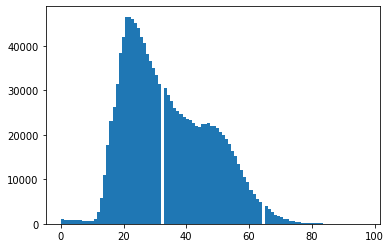

In [9]:
# Take a look at age, sex, and descent in more detail
plot.hist(crime['Age'], bins = 100)

(array([ 276609.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1050017.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

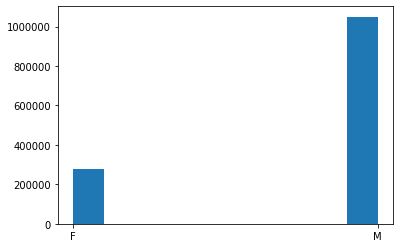

In [10]:
plot.hist(crime['Sex Code'])

(array([1.000321e+06, 3.172090e+05, 6.478000e+03, 9.510000e+02,
        5.300000e+01, 9.500000e+02, 1.900000e+02, 4.520000e+02,
        1.300000e+01, 9.000000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

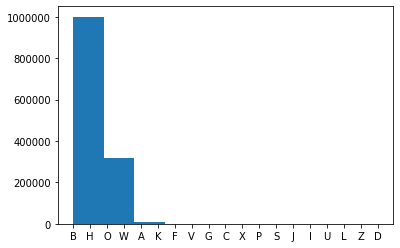

In [11]:
plot.hist(crime['Descent Code'])

In [14]:
# Compare some groupings for insight
bySex = crime.groupby(by = ['Sex Code'])
#ax = bySex.plot(kind = 'bar')
bySex.head()

,Arrest Date,Time,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,2019-05-03,1700.0,Southeast,1802,23,F,B,nan,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,2019-04-29,1040.0,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,2019-11-23,1830.0,Hollenbeck,457,23,F,H,3.0,Robbery,F,211PC,ROBBERY,FICKETT,CINCINNATI,"(34.0477, -118.2047)"
3,2019-04-30,615.0,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
4,2019-04-30,1100.0,Van Nuys,901,2,F,H,nan,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
5,2019-04-30,1550.0,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"
6,2019-11-19,800.0,N Hollywood,1503,39,F,H,nan,NaN,M,369I,NaN,SHERMAN WY,VINELAND,"(34.2003, -118.4002)"
7,2019-11-20,1410.0,Wilshire,742,45,F,W,3.0,Robbery,F,211PC,ROBBERY,6200 WILSHIRE BL,NaN,"(34.0632, -118.3634)"
8,2019-11-23,1035.0,Southwest,328,20,M,A,nan,NaN,I,41.27(C)LAM,NaN,28TH ST,FIGUEROA ST,"(34.0264, -118.278)"
11,2019-11-26,1600.0,Van Nuys,935,32,M,H,13.0,Prostitution/Allied,M,647(B)(2)PC,ENGAGE/SOLICIT SEX FOR MONEY/ETC,14400 ERWIN ST,NaN,"(34.1837, -118.4465)"
